In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


We need:

Function for train/test splitting

Function for fitting the model

Function for running prediction on the holdout (test) set

Function for outputting some analysis (organized text is fine)

In [199]:
class LinearRegression():
    def __init__(self, X, Y):
        self.Y = np.array(Y)
        X = np.array(X)
        if len(X.shape) == 1:
            X = X.reshape((-1,1))
        print(X.shape)
        offset = np.ones(shape=(X.shape[0],1))
        self.X = np.append(offset,np.array(X),1)
        
        
        self.beta = 0
        self.r2 = 0
    
    def train_test_split(self, split=0.25):
        l = np.arange(len(self.X))
        np.random.shuffle(l)
        testX = self.X[l[:int(split*len(l))]]
        trainX = self.X[l[int(split*len(l)):]]
        testY = self.Y[l[:int(split*len(l))]]
        trainY = self.Y[l[int(split*len(l)):]]
        
        return trainX, trainY, testX, testY
    
    def fit(self, n=10, split=0.25):
        bestbeta = 0
        for _ in range(n):
            x, y, testX, testY = self.train_test_split(split)
            self.beta = np.linalg.inv(x.transpose().dot(x)).dot(x.transpose()).dot(y)
            r2 = self.goodness_of_fit(testX, testY)
            if r2 > self.r2:
                bestbeta =  self.beta
                self.r2 = r2
        self.beta = bestbeta
        
    
    def predict(self, X):
        return X.dot(self.beta)
    
    def goodness_of_fit(self, X, Y):
        SSres = np.sum((self.predict(X)-Y)**2)
        SStot = np.sum((Y-np.mean(Y))**2)
        return 1 - SSres/SStot
        

Start by taking the simplest possible example. Calculate the regression with only two data points (price for dependent and number of rooms for independent)

Then use price as the dependent variable and all others as independent variables

In [200]:
X = df['Avg. Area Number of Rooms']
Y = df['Price']

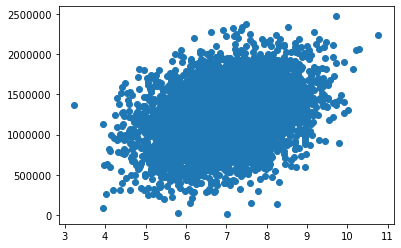

In [194]:
plt.scatter(X,Y)

In [201]:
lr = LinearRegression(X,Y)

(5000, 1)


In [202]:
lr.fit(n=10000,split=0.25)

In [203]:
lr.r2

0.16073357478329742

In [205]:
x, y, testX, testY = lr.train_test_split(0.2)

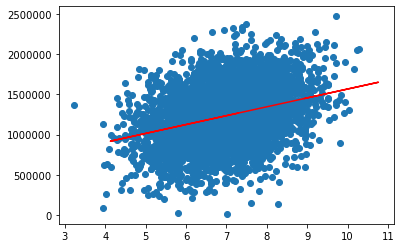

In [210]:
predY = lr.predict(testX)
plt.scatter(x[:,1],y)
plt.plot(testX[:,1], predY, c='r')

With all variables

In [95]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [178]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [179]:
lr = LinearRegression(X,Y)

(5000, 5)


TypeError: _reshape_dispatcher() missing 2 required positional arguments: 'a' and 'newshape'

In [134]:
lr.fit(n=1000,split=0.25)

In [153]:
x, y, testX, testY = lr.train_test_split(0.2)

In [174]:
testX.shape

(1000, 6)

In [161]:
for i in range(2,6):
    testX[:,i] = np.mean(testX[:,i])

In [162]:
predy = lr.predict(testX)

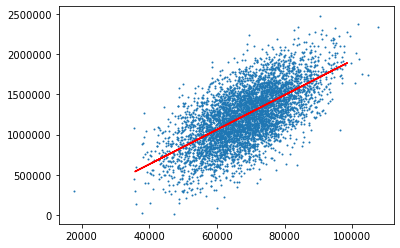

In [163]:
plt.scatter(lr.X[:,1],lr.Y, s= 1)
plt.plot(testX[:,1],predy, c='r')

In [151]:
predy

array([1222409.21857651, 1493679.59783926, 1253813.27791206, ...,
       1019942.48747385, 1266322.69225058, 1303314.73739716])